# Oppimispäiväkirja - Viikko 4

Tämän viikon luennolta inspiroituneena halusin perehtyä lisää CRISP-DM:ään. Kurssilla on noussut monesti esille se, kuinka tärkeää on liiketoiminnan ymmärtäminen analyysien taustalla. Organisaatiot tarvitsevatkin analytiikan lisäksi myös konsultaatiota liiketoimintaongelmien löytämiseen. Olen aikaisemmilla viikoilla muistaakseni kaivannut prosesseja (koska tietojohtajana prosessit on pop) nyt viimeistään sain sellaisen.

1. Business understanding – Ymmärtää organisaation liiketoimintaa ja tunnistaa organisaation tarpeet.
2. Data understanding – Tiedostaa, mitä dataa on saatavilla ja missä muodossa, sekä toisaalta, mitä dataa todellisuudessa tarvitaan, sekä tunnistaa näiden välinen ero. 
3. Data preparation – Siivoa data niin, että sitä voi käyttää mallinnuksessa.
4. Modeling – Osaa valita kyseiseen tapaukseen parhaiten soveltuvat mallinnustekniikat.
5. Evaluation – Valitsee parhaiten kuvaavan mallin.
6. Deployment – Vie mallin tuotantoon niin, että se alkaa tuottaa arvoa sidosryhmille.

Luennolla esitelty Houston Analyticsin malli Problem-Solution tiimeistä oli mielestäni myös erittäin järkevän kuuloinen lähestymistapa datatieteen toteutukseen. Mietin kuitenkin, että ajattelumallia voisi varmasti soveltaa myös ilman, että muodostaisi erillisiä tiimejä. Eli jatkuvasti tarkastelisiin myös liiketoiminnan näkökulmasta toimintaa ja edettäisiin iteratiivisesti. Toisaalta silloin kun nämä jakaa kahteen eri tiimiin ja tiimit tekevät tiiviisti yhteistyötä, voi molemmat tiimit keskittyä täysin omaan osuuteensa ja tukea samalla toistensa työtä.

### Tärkeimmät opit
1. CRISP-DM prosessi.
2. Jakautuminen Problem-Solution tiimeihin ongelman ratkaisemiseksi.
3. Liiketoiminta ja liiketoimintaongelmien tunnistaminen tulee olla kaiken analytiikan taustalla.
4. Valmiita kirjastoja ja palveluita on olemassa laidasta laitaan ja lähes joka tarkoitukseen.
5. Datatieteessä ei välttämättä ole oikeaa tapaa tehdä asioita, vaan mahdollisia toteutustapoja on äärettömän monia.

### Risut ja ruusut luentoviikolle
- Tämä luento olisi varmasti ollut paljon parempi niin, että olisi itse ollut Zoomissa paikan päällä. Luentotallenteena ei toiminut niin hyvin, kun ei päässyt osallistumaan ryhmäkeskusteluihin. Nyt luento jakautui irrallisiksi kokonaisuuksiksi, jolloin seuraaminen hankaloitui jonkun verran.
- On huippua, että luennoilla annetaan paljon esimerkkejä erilaisista kirjastoista ja palveluista (kuten tällä viikolla Jinja2, jQuery ja steamlit), joita voi käyttää harjoitustyössä ja ehkä joskus tulevaisuudessa työelämässä hyödyksi. 

### Kehitysehdotukset 
- Voisiko CRISP-DM prosessia käyttää hyväksi myös luentojen järjestyksen suunnittelussa? Tämä liiketoiminnan tunnistamisen ja sen ymmärtämisen tärkeys olisi voinut toimia paremmin ensimmäisten luentojen joukossa, ennen kun ollaan siirrytty datan siivoamiseen ja mallintamiseen. Näin datatieteen prosessikin voisi olla helpompi hahmottaa.

## Linkit ja lähteet
- What is CRISP-DM: https://www.datascience-pm.com/crisp-dm-2/
- Houston Analytics Project Methodology: https://www.houston-analytics.com/project-methodology

*(Katsoin molemmat oppimistapahtumat tallenteina. Aineistona käytetty luentoa, luentomuistiota ja koodiklinikkaa.)*

In [2]:
# Koodiesimerkki - vk 4

# Haetaan tarvittavat kirjastot
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import os

In [3]:
# Ladataan data
if os.path.exists('data.csv'):
        df = pd.read_csv('data.csv')
else:
    df = pd.read_csv('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2018-01-17/data/listings.csv.gz', compression='gzip')
    df.to_csv('data.csv')
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16313 entries, 0 to 16312
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                16313 non-null  int64  
 1   listing_url                       16313 non-null  object 
 2   scrape_id                         16313 non-null  int64  
 3   last_scraped                      16313 non-null  object 
 4   name                              16302 non-null  object 
 5   summary                           15860 non-null  object 
 6   space                             11798 non-null  object 
 7   description                       16305 non-null  object 
 8   experiences_offered               16313 non-null  object 
 9   neighborhood_overview             10343 non-null  object 
 10  notes                             6734 non-null   object 
 11  transit                           10186 non-null  object 
 12  acce

In [4]:
df = df[['host_response_time', 'host_response_rate','review_scores_rating']]

print(df.head())
print(df.host_response_time.unique())

  host_response_time host_response_rate  review_scores_rating
0       within a day                60%                  89.0
1     within an hour               100%                  91.0
2     within an hour               100%                  79.0
3     within an hour               100%                  90.0
4     within an hour               100%                  80.0
['within a day' 'within an hour' 'within a few hours' nan
 'a few days or more']


In [5]:
# Poistetaan kaikki tyhjän arvon sisältävät rivit
df = df.dropna()

In [6]:
df.host_response_rate = df.host_response_rate.str.strip('%')
df.host_response_rate = pd.to_numeric(df.host_response_rate)

In [7]:
# Muutetaan host_response_time attribuutti kategorialliseksi muuttujaksi
le = preprocessing.LabelEncoder()

arr = le.fit_transform(df.host_response_time)

df.host_response_time = arr

In [8]:
print(arr)

[1 3 3 ... 3 3 3]


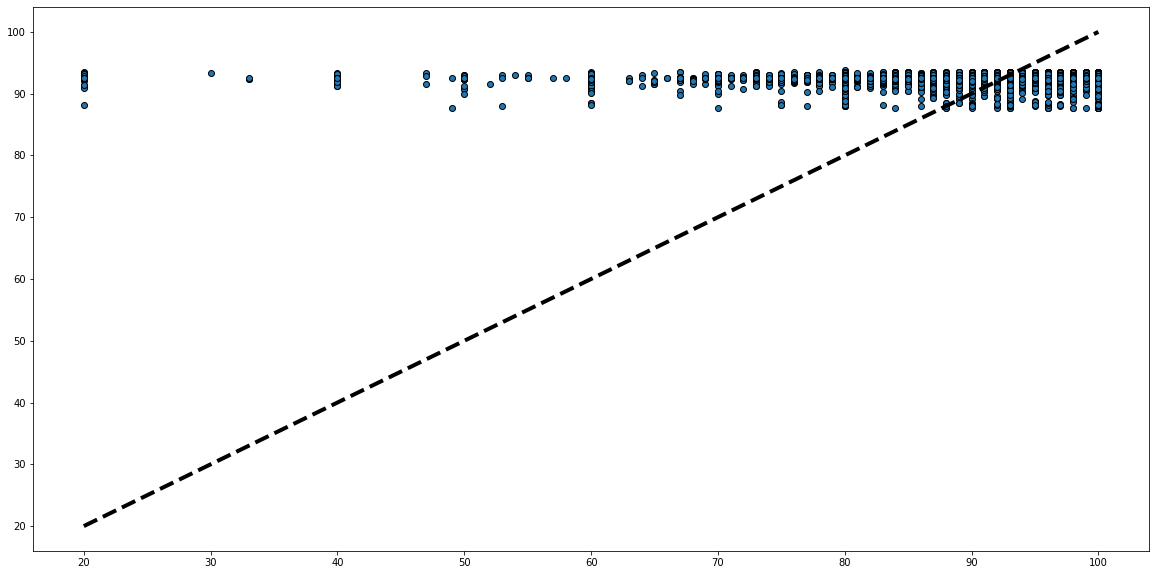

In [10]:
# Lineaarinen regressio
lr = linear_model.LinearRegression()

# Määritellään muuttujat
y = df.review_scores_rating
X = df.drop(columns='review_scores_rating')

predict = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y, predict, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()